In [1]:
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wf_dir = Path('/home/jared/code/gambit/gambit-publication/')

In [4]:
genome_sets = [f'set{i+1}' for i in range(4)]

In [8]:
df = pd.concat(
    [pd.read_csv(wf_dir / f'intermediate-data/gambit-vs-ani/{gset}-11-ATGAC.csv', index_col=[0, 1]) for gset in genome_sets],
    keys=genome_sets,
    names=['genome_set'],
)

In [10]:
df_clean = df[~df['ani'].isnull()]

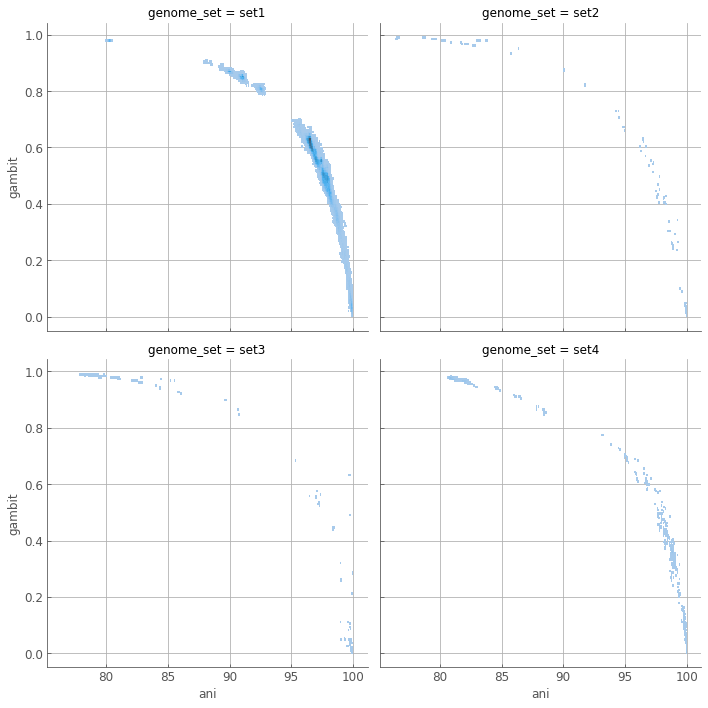

In [12]:
sns.displot(
    data=df_clean.reset_index(),
    x='ani',
    y='gambit',
    col='genome_set',
    col_wrap=2,
)

In [60]:
from scipy.stats import linregress

In [ ]:
def kernel_regression(x, y, bw):
    def f(x):
        pass
    
    return f

In [61]:
np.frompyfunc

Docstring:
frompyfunc(func, /, nin, nout, *[, identity])

Takes an arbitrary Python function and returns a NumPy ufunc.

Can be used, for example, to add broadcasting to a built-in Python
function (see Examples section).

Parameters
----------
func : Python function object
    An arbitrary Python function.
nin : int
    The number of input arguments.
nout : int
    The number of objects returned by `func`.
identity : object, optional
    The value to use for the `~numpy.ufunc.identity` attribute of the resulting
    object. If specified, this is equivalent to setting the underlying
    C ``identity`` field to ``PyUFunc_IdentityValue``.
    If omitted, the identity is set to ``PyUFunc_None``. Note that this is
    _not_ equivalent to setting the identity to ``None``, which implies the
    operation is reorderable.

Returns
-------
out : ufunc
    Returns a NumPy universal function (``ufunc``) object.

See Also
--------
vectorize : Evaluates pyfunc over input arrays using broadcasting ru

In [13]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [20]:
from patsy import dmatrices

In [55]:
endog, exog = dmatrices('ani ~ gambit', df_clean.loc['set3'])#, return_type='dataframe')

In [59]:
kr = KernelReg(endog, exog, var_type='cc', reg_type='ll')

/home/jared/opt/anaconda3/envs/gambit-pub/lib/python3.9/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))


LinAlgError: SVD did not converge

In [50]:
x = df_clean.loc['set3', 'gambit'].values
y = df_clean.loc['set3', 'ani'].values

In [53]:
kr = KernelReg(y, x[:, None], var_type='c', reg_type='ll')

In [54]:
kr.fit()

(array([78.59143967, 99.96226711, 78.58180973, 78.60131222, 89.72512029,
        78.75250092, 78.8818427 , 79.32226415, 79.08128321, 79.94637512,
        78.76590405, 78.8818427 , 99.80134704, 79.84311719, 78.50555428,
        78.59143967, 99.93257706, 78.86653444, 79.04622626, 78.86653444,
        78.73934851, 78.89737178, 99.93092436, 79.96710988, 99.81009448,
        78.86653444, 78.44621399, 99.918     , 78.37443214, 78.73934851,
        78.85145153, 99.78123238, 79.51844744, 99.74356248, 78.83659821,
        99.34699427, 80.87568159, 99.96618996, 78.59143967, 99.96491282,
        78.54565893, 95.34045   , 78.75250092, 78.8818427 , 99.97903063,
        79.94637512, 99.80346416, 78.86653444, 99.93839274, 99.77340396,
        99.93423615, 99.91316791, 78.59143967, 99.9001955 , 99.91676422,
        82.69482986, 78.66576506, 82.69482986, 82.69482986, 82.72027332,
        99.97154954, 99.93423615, 99.96293983, 78.58180973, 82.87960855,
        82.51510133, 78.75250092, 82.55825827, 82.5